In [2]:
import pickle
from pathlib import Path
import pydicom
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import cv2
import numpy as np
from collections import Counter
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [3]:
def pick_first(loaded_list):
    new_list = []
    for item in loaded_list:
        try:
            number = int(item[0])
            new_list.append(number)
        except:
            new_list.append(-1)
    return new_list


def draw_CR(image_data):
    
    plt.imshow(image_data, cmap='gray') 
    plt.axis('off')
    plt.show()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_confusion_matrix(y_true, y_pred):
    # 計算混淆矩陣
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    # 使用Seaborn畫出混淆矩陣
    sns.set(color_codes=True)
    plt.figure(1, figsize=(8, 6))
    
    plt.title("Confusion Matrix")
    
    sns.heatmap(cm, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'}, fmt='g')
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    
    plt.show()

In [4]:
name_list = ["INTER_AREA","INTER_LINEAR", "INTER_CUBIC","INTER_LANCZOS4","INTER_NEAREST"]
name = name_list[3]
base_zip_1 = './data_covid_test/zip_lists_9999_'+name+".pkl"
base_zip_2 = './data_covid_test/zip_lists_15000_'+name+".pkl"
base_image_1 = './data_covid_test/image_lists_9999_'+name+".pkl"
base_image_2 = './data_covid_test/image_lists_15000_'+name+".pkl"
with open(base_zip_1, 'rb') as f:
    dic_load_list_1 = pickle.load(f)

with open(base_image_1, 'rb') as f:
    image_load_list_1 = pickle.load(f)
        
with open(base_zip_2, 'rb') as f:
    dic_load_list_2 = pickle.load(f)

with open(base_image_2, 'rb') as f:
    image_load_list_2 = pickle.load(f)
    
dic_load_list = dic_load_list_1 + dic_load_list_2
image_load_list = image_load_list_1 + image_load_list_2

In [5]:
dic_load_list[0]

{'zip': '0',
 'manufacturer': '',
 'manufacturer_model_name': '',
 'age': 59.0,
 'ethnicity': 'Not Hispanic or Latino',
 'race': 'White',
 'sex': 'Male',
 'covid_test': 'Negative',
 'ImageType': "['DERIVED', 'PRIMARY']",
 'ContrastBolusAgent': '',
 'BodyPartExamined': 'CHEST',
 'KVP': '85',
 'SoftwareVersions': '1.4',
 'DistanceSourceToDetector': '0',
 'ExposureTime': '6',
 'XRayTubeCurrent': '322',
 'Exposure': '2',
 'ExposureInuAs': '2000',
 'ImagerPixelSpacing': '[0.139, 0.139]',
 'FocalSpots': '1.2',
 'RelativeXRayExposure': '1713',
 'ExposureIndex': '450.59',
 'TargetExposureIndex': '200',
 'DeviationIndex': '3.53',
 'PatientPosition': '',
 'ViewPosition': 'AP',
 'ExposureInmAs': '2.0'}

In [6]:
zip_load_list = []
three_load_list = []
for item in dic_load_list:
    zip_load_list.append(item['zip'])
    try:
        three_load_list.append([int(item['Exposure']), int(item['ExposureInuAs']), int(item['ExposureTime']), int(item['XRayTubeCurrent'])])
    except:
        three_load_list.append([0,0,0,0])

# race label

In [30]:
#dic_load_list
#image_load_list
label_list = []
image_list = []
setting_list = []
label_name = 'race'
all_list = []
fail = 0

for i in range(len(dic_load_list)):
    try:
        all_list.append(dic_load_list[i][label_name])
        if(dic_load_list[i][label_name] == 'White'):
            label_list.append(1)
        elif(dic_load_list[i][label_name] == 'Black or African American'):
            label_list.append(0)
        else:
            continue
        
        image_list.append(image_load_list[i])
        setting_list.append(three_load_list[i])
    except:
        fail+=1

print(len(image_list),len(label_list))

6497 6497


In [31]:
Counter(label_list)

Counter({1: 3360, 0: 3137})

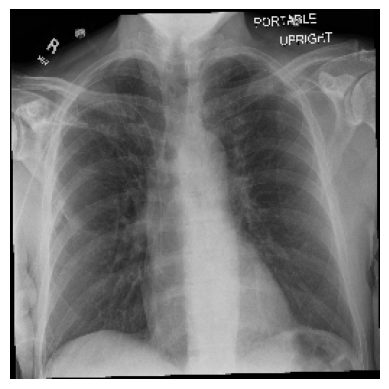

In [32]:

draw_CR(image_list[0])

In [33]:
X = np.array(image_list) 
X = X.reshape((-1, 256, 256, 1)) 
y = to_categorical(label_list, num_classes=2)  
y = np.array(label_list) 
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y = np.array(label_list) 
X = np.array(setting_list) 
X_train_exp, X_temp_exp, _, _ = train_test_split(X, y, test_size=0.3, random_state=42)
X_val_exp, X_test_exp, _, _ = train_test_split(X_temp_exp, y_temp, test_size=0.5, random_state=42)
scaler = StandardScaler()

# ResNet50

In [12]:
def modify_list(lst):
    # 使用列表推導式修改列表
    return [1 if x[0] > 0.5 else 0 for x in lst]

In [13]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

def build_model(input_shape=(256, 256, 1)):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Set the base model's layers to be non-trainable
    base_model.trainable = False

    # Building the model
    model = models.Sequential([
        layers.experimental.preprocessing.Resizing(224, 224),
        layers.Conv2D(3, (3, 3), padding='same'),  # To match the input_shape of ResNet50
        base_model,  # The pre-trained base model
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')  # Adjusted for binary classification
    ])

    return model

# Instantiate the model
model_ResNet50 = build_model()

# Compile the model with binary_crossentropy loss function for binary classification
model_ResNet50.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [43]:
from tensorflow.keras.models import load_model
model_ResNet50 = load_model('./image_models/model_ResNet50INTER_LANCZOS4_race/')

In [91]:
model_ResNet50.fit(X_train, y_train, epochs=2, validation_data=(X_val, y_val))

test_loss, test_acc = model_ResNet50.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/2
143/143 [==============================] - 344s 2s/step - loss: 0.5210 - accuracy: 0.7486 - val_loss: 0.5187 - val_accuracy: 0.7703
Epoch 2/2
31/31 [==============================] - 24s 777ms/step - loss: 0.5279 - accuracy: 0.7559
Test accuracy: 0.7559


In [44]:

test_loss, test_acc = model_ResNet50.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

31/31 [==============================] - 40s 1s/step - loss: 1.3146 - accuracy: 0.2523
Test accuracy: 0.2523


In [34]:
from tensorflow.keras.models import load_model 
model_ResNet50.save('./image_models/model_ResNet50'+name+'_'+label_name)  

INFO:tensorflow:Assets written to: ./image_models/model_ResNet50INTER_LANCZOS4_race/assets


INFO:tensorflow:Assets written to: ./image_models/model_ResNet50INTER_LANCZOS4_race/assets


In [44]:
Counter(y_test)

Counter({0: 514, 1: 461})

In [45]:
y_pred_image_t = model_ResNet50.predict(X_test)

31/31 [==============================] - 43s 1s/step


In [46]:
y_pred_image_t_n = modify_list(y_pred_image_t)

In [39]:
def reverse_0s_and_1s(lst):
    return [1 if x == 0 else 0 if x == 1 else x for x in lst]

[[330 131]
 [115 399]]


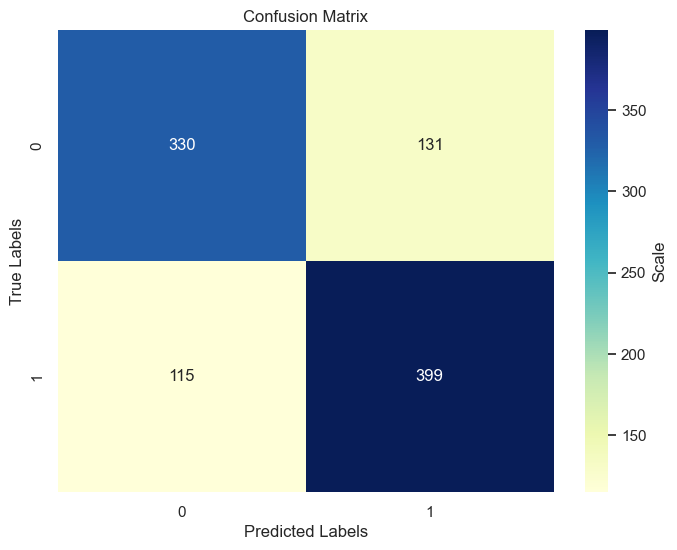

In [47]:
plot_confusion_matrix((y_test), reverse_0s_and_1s(y_pred_image_t_n))

In [101]:
from sklearn.metrics import roc_auc_score
y_pred_test = model_ResNet50.predict(X_test)

auroc = roc_auc_score(y_test, y_pred_test.ravel())
print(f"測試集上的AUROC: {auroc}")

31/31 [==============================] - 26s 803ms/step
測試集上的AUROC: 0.8199439553668645


# RF

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# 創建隨機森林分類器
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)

# 訓練模型
y_train_labels = y_train
y_test_labels = y_test
rf_model.fit(X_train_exp, y_train_labels)
y_pred_test = rf_model.predict(X_test_exp)

test_acc = accuracy_score(y_test_labels, y_pred_test)
print(f"測試集上的準確率: {test_acc}")

y_pred_val = rf_model.predict(X_val_exp)
test_acc = accuracy_score(y_val, y_pred_val)
print(f"測試集上的準確率: {test_acc}")

測試集上的準確率: 0.7610256410256411
測試集上的準確率: 0.7856410256410257


[[372  99]
 [110 394]]


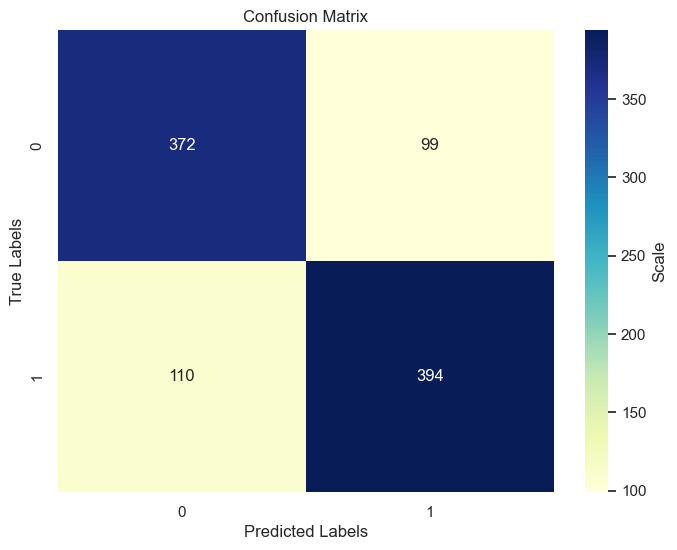

In [36]:
plot_confusion_matrix(y_val, y_pred_val)

# Fake Test

In [16]:
y_train_pred_image_t =  rf_model.predict(X_train_exp)

y_test_pred_image_t =  rf_model.predict(X_test_exp)

y_val_pred_image_t =  rf_model.predict(X_val_exp)

In [17]:
model_ResNet50_fake = build_model()

# Compile the model with binary_crossentropy loss function for binary classification
model_ResNet50_fake.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
model_ResNet50.fit(X_train, y_train_pred_image_t, epochs=1, validation_data=(X_val, y_val_pred_image_t))

test_loss, test_acc = model_ResNet50.evaluate(X_test, y_test_pred_image_t)
print(f"Test accuracy: {test_acc:.4f}") #val_accuracy: 0.8677, Test accuracy: 0.8544

31/31 [==============================] - 41s 1s/step - loss: 0.3944 - accuracy: 0.8431
Test accuracy: 0.8431


In [28]:
test_loss, test_acc = model_ResNet50.evaluate(X_val, y_val_pred_image_t)
print(f"val accuracy: {test_acc:.4f}")

31/31 [==============================] - 25s 811ms/step - loss: 0.2741 - accuracy: 0.8964
val accuracy: 0.8964


In [29]:
from sklearn.metrics import roc_auc_score
#y_pred_test = model_ResNet50.predict(X_test)
auroc = roc_auc_score(y_test_pred_image_t, y_pred_test.ravel())
print(f"測試集上的AUROC: {auroc}")

測試集上的AUROC: 0.9373789595998722
